1 - Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

**2 - First exercise: Clustering some synthetic 2D data**

2.1 - Read the file

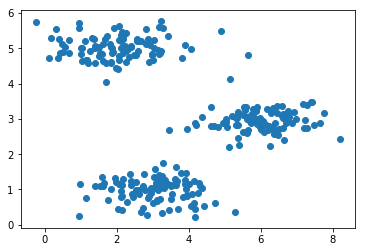

In [2]:
def extract_data(file):
    # Create matrix
    data = []

    # Open the file
    with open(file, 'r') as file:
        for line in file:
            point = line.split()
            
            data.append([float(point[0]), float(point[1])])
    
    return np.c_[np.array(data), np.zeros(len(data))]

X = extract_data('data_kmeans.txt')
plt.scatter(X[:, 0], X[:, 1])

2.2 - Create the centroids

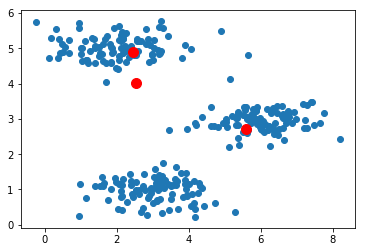

In [28]:
nb_centr = 3

centroids = np.random.uniform(low=np.amin(X) + 2, high=np.amax(X) - 2, size=(nb_centr, 2))
centroids = centroids[: , np.newaxis, :]

def plot_centroids(centroids):
    for i in range(nb_centr):
        plt.scatter(centroids[i, 0, 0], centroids[i, 0, 1], c='r', s=100)
    
plt.scatter(X[:, 0], X[:, 1])
plot_centroids(centroids)

2.3 - Find the right position for the centroids

In [26]:
def get_col(centr):
    if centr == 0.:
        return 'b'
    elif centr == 1.:
        return 'g'
    elif centr == 2.:
        return 'y'
    elif centr == 3.:
        return 'm'
    elif centr == 4.:
        return 'c'
    elif centr == 5.:
        return 'k'

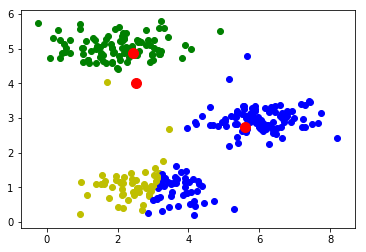

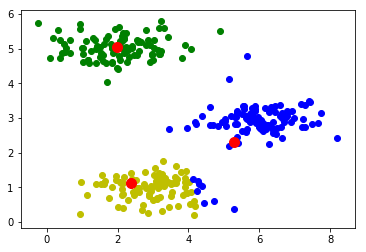

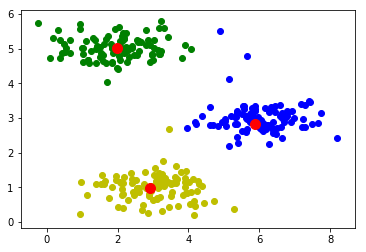

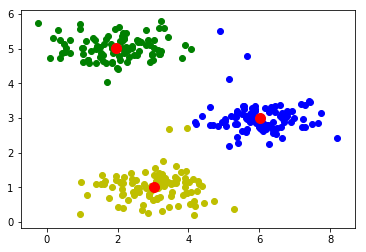

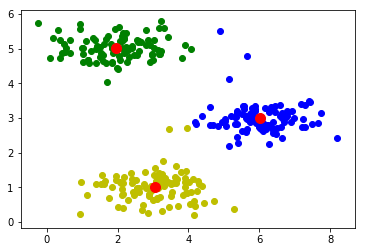

In [29]:
eps = 0.01
change = 1

# Repeat until convergence
while change > eps:
    # Get the index of the closest centroid
    X[:, -1:] = np.vstack(np.argmin(np.sqrt(((X[:, :-1] - centroids)**2).sum(axis=2)), axis=0))
    
    # Plot data
    for point in X:
        plt.scatter(point[0], point[1], c=get_col(point[2]))
        
    plot_centroids(centroids)
    plt.pause(0.05)
    plt.show()

    # Get centroids'  new position
    new_centroids = np.zeros((nb_centr, 2))
    for i in range(centroids.shape[0]):
        new_centroids[i] = X[:, :2][np.where(X[:, 2] == float(i))].sum(axis=0) / (X[:, 2] == i).sum()
    
    # Compute change of centroids
    change = abs((centroids - new_centroids).sum())
    
    # Update centroids
    centroids = new_centroids[: , np.newaxis, :]